# Imports

In [30]:
import numpy as np
from PIL import Image
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Load image

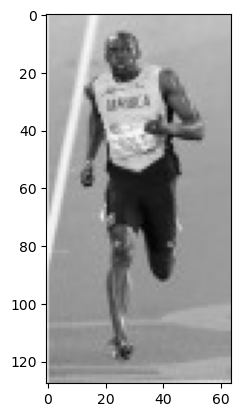

In [31]:
original_img = Image.open('bolt.jpg')

gray_img = original_img.convert('L')

gray_img = np.asarray(gray_img).astype(np.uint8)

plt.imshow(gray_img, cmap='gray')
plt.show()

# HOG

## My implementation

### Gradients

In [32]:
kernel_x = np.array([-1, 0, 1]).reshape(1, 3)
kernel_y = kernel_x.T

gx = convolve2d(gray_img, kernel_x, mode='same', boundary='symm')
gy = convolve2d(gray_img, kernel_y, mode='same', boundary='symm')

### Magnitude and direction

In [33]:
magnitude = np.sqrt(gx ** 2 + gy ** 2)

direction = np.arctan2(gy, gx)

direction_deg = np.rad2deg(direction) % 180

### Histogram computation

In [34]:
H, W = gray_img.shape

cell_size = 8

n_cells_y = H // cell_size
n_cells_x = W // cell_size

n_bins = 9

hog_cells = np.zeros((n_cells_y, n_cells_x, n_bins))

for i in range(n_cells_y):
    for j in range(n_cells_x):

        y_start = i * cell_size
        x_start = j * cell_size

        cell_magnitude = magnitude[y_start : y_start+cell_size, x_start : x_start+cell_size]
        cell_direction_deg = direction_deg[y_start : y_start+cell_size, x_start : x_start+cell_size]
        
        hist, _ = np.histogram(cell_direction_deg, bins=n_bins, range=(0, 180), weights=cell_magnitude)
        hog_cells[i, j] = hist

### Normalization

In [35]:
epsilon = 1e-5
hog_features = []

for i in range(n_cells_y - 1):
    for j in range(n_cells_x - 1):

        block = hog_cells[i : i+2, j : j+2]
        
        block_vector = block.flatten()
        
        block_norm = block_vector / np.sqrt(np.sum(block_vector**2) + epsilon)
        
        hog_features.append(block_norm)

### Descriptor

In [36]:
hog_descriptor = np.array(hog_features).flatten()

### Views

Dimensão da Imagem: (128, 64)
Grade de Células: (16, 8, 9)
Número de Blocos: 105
Tamanho do Vetor HOG Final: (3780,)


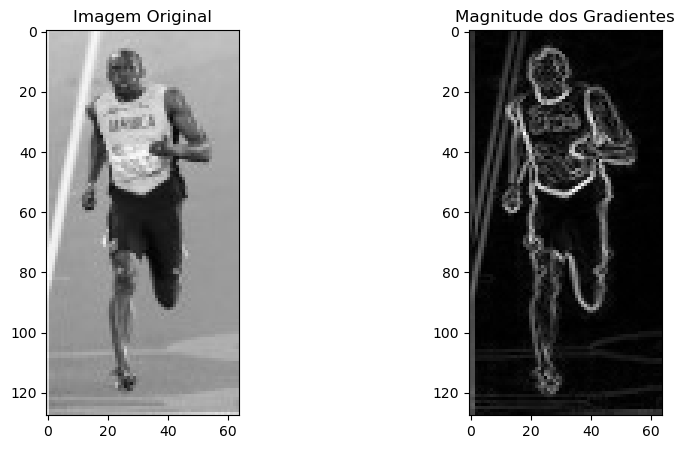

In [ ]:
print(f"Dimensão da Imagem: {gray_img.shape}")
print(f"Grade de Células: {hog_cells.shape}")
print(f"Número de Blocos: {len(hog_features)}")
print(f"Tamanho do Vetor HOG Final: {hog_descriptor.shape}")

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Imagem Original')
plt.subplot(122), plt.imshow(magnitude, cmap='gray'), plt.title('Magnitude dos Gradientes')
plt.show()

view = np.zeros_like(gray_img)

for i in range(n_cells_y):
    for j in range(n_cells_x):

        y_start = i * cell_size
        x_start = j * cell_size
        y_start = i * cell_size
        x_start = j * cell_size

## Skimage implementation

Tamanho do Vetor HOG Final: (3780,)


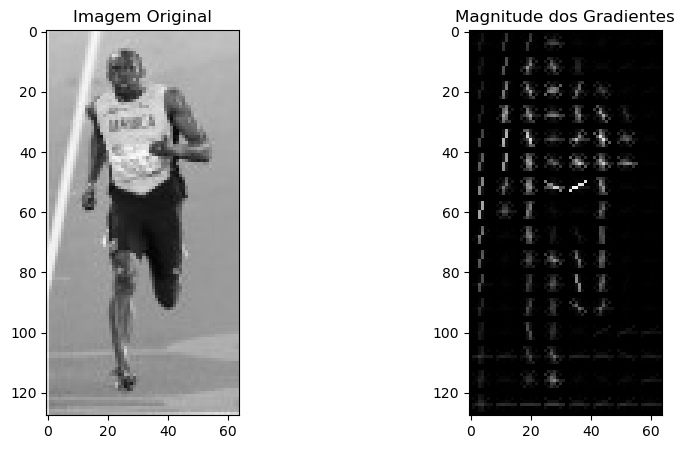

In [45]:
from skimage.feature import hog
from skimage import exposure

fd, hog_image = hog(gray_img, 
                    orientations=9, 
                    pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), 
                    visualize=True)

print(f"Tamanho do Vetor HOG Final: {fd.shape}")

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Imagem Original')
plt.subplot(122), plt.imshow(hog_image, cmap='gray'), plt.title('Magnitude dos Gradientes')
plt.show()